In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

path = r'/home/milky/drosophila-SNA/data/processed/0_0_preproc_data/CsCh/CsCh_A1_05_05_2023-11_21/fly1.csv'

df = pd.read_csv(path)

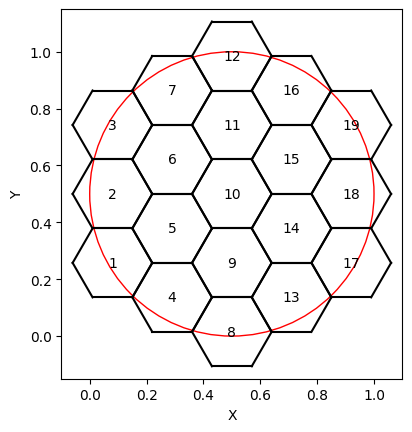

25


In [13]:
def generate_hexagonal_lattice(circle_radius, hexagon_side):
    x_coords = []
    y_coords = []
    max_x = int(circle_radius / (1.5 * hexagon_side)) + 1
    max_y = int(circle_radius / (np.sqrt(3) * hexagon_side)) + 1
    for i in range(-max_x, max_x + 1):
        for j in range(-max_y, max_y + 1):
            x = 1.5 * hexagon_side * i
            y = np.sqrt(3) * hexagon_side * (j + 0.5 * (i % 2))
            x_coords.append(x + 0.5)
            y_coords.append(y + 0.5)
    return x_coords, y_coords


def is_inside_circle(x, y, circle_radius):
    # Function to check if a point (x, y) is inside the circle
    return (x - 0.5)**2 + (y - 0.5)**2 <= circle_radius**2

def plot_hexagonal_lattice(x_coords, y_coords, hexagon_side, circle_radius):
    plt.figure()
    ax = plt.gca()
    ax.set_aspect('equal')

    labeled_hexagons_coords = []  # List to store the coordinates of labeled hexagons
    counter = 1
    for idx, (i, j) in enumerate(zip(x_coords, y_coords), 1):
        hexagon_in_circle = any(is_inside_circle(i + hexagon_side * np.cos(k * np.pi / 3),
                                                 j + hexagon_side * np.sin(k * np.pi / 3),
                                                 circle_radius) for k in range(6))
        if hexagon_in_circle:
            labeled_hexagons_coords.append((i, j))  # Append coordinates to the list

            for k in range(6):
                x1 = i + hexagon_side * np.cos(k * np.pi / 3)
                y1 = j + hexagon_side * np.sin(k * np.pi / 3)
                x2 = i + hexagon_side * np.cos((k + 1) * np.pi / 3)
                y2 = j + hexagon_side * np.sin((k + 1) * np.pi / 3)
                plt.plot([x1, x2], [y1, y2], 'k-')

            # Adding the numerical label at the center of each hexagon inside/partly inside the circle
            label_x = i
            label_y = j
            plt.text(label_x, label_y, str(counter), ha='center', va='center', fontsize=10)
            counter += 1

    circle = plt.Circle((0.5, 0.5), circle_radius, color='r', fill=False)
    ax.add_patch(circle)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.15, 1.15)
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.title(f'Hexagonal Lattice with Circle')
    # plt.grid()
    plt.show()

    return labeled_hexagons_coords


def point_in_hexagon(x, y, hexagon_center_x, hexagon_center_y, hexagon_side):
    # Define the vertices of the hexagon
    hexagon_vertices = []
    for k in range(6):
        angle = k * np.pi / 3
        vertex_x = hexagon_center_x + hexagon_side * np.cos(angle)
        vertex_y = hexagon_center_y + hexagon_side * np.sin(angle)
        hexagon_vertices.append((vertex_x, vertex_y))
    
    # Check if the point is inside the hexagon using the point-in-polygon algorithm
    num_vertices = len(hexagon_vertices)
    j = num_vertices - 1
    odd_nodes = False
    for i in range(num_vertices):
        if (hexagon_vertices[i][1] < y and hexagon_vertices[j][1] >= y) or \
           (hexagon_vertices[j][1] < y and hexagon_vertices[i][1] >= y):
            if hexagon_vertices[i][0] + (y - hexagon_vertices[i][1]) / \
               (hexagon_vertices[j][1] - hexagon_vertices[i][1]) * \
               (hexagon_vertices[j][0] - hexagon_vertices[i][0]) < x:
                odd_nodes = not odd_nodes
        j = i
    
    return odd_nodes

def find_lattice_label(x, y, x_coords, y_coords, hexagon_side, circle_radius):
    for idx, (i, j) in enumerate(zip(x_coords, y_coords), 1):
        hexagon_in_circle = any(is_inside_circle(i + hexagon_side * np.cos(k * np.pi / 3),
                                                 j + hexagon_side * np.sin(k * np.pi / 3),
                                                 circle_radius) for k in range(6))
        if hexagon_in_circle and point_in_hexagon(x, y, i, j, hexagon_side):
            return idx
    return None

if __name__ == "__main__":
    CIRCLE_RADIUS = 0.5  # Radius of the circle
    HEXAGON_SIDE = 0.14  # Change this value to control the hexagon side size

    x_coords, y_coords = generate_hexagonal_lattice(CIRCLE_RADIUS, HEXAGON_SIDE)
    labeled_hexagons_coords = plot_hexagonal_lattice(x_coords, y_coords, HEXAGON_SIDE, CIRCLE_RADIUS)

    given_x = 0.5
    given_y = 0.5
    lattice_label = find_lattice_label(given_x, given_y, x_coords, y_coords, HEXAGON_SIDE, CIRCLE_RADIUS)

    print(lattice_label)

In [83]:
if __name__ == "__main__":
    CIRCLE_RADIUS = 0.5  # Radius of the circle
    HEXAGON_SIDE = 0.15  # Change this value to control the hexagon side size

    x_coords, y_coords = generate_hexagonal_lattice(CIRCLE_RADIUS, HEXAGON_SIDE)
    labeled_hexagons_coords = plot_hexagonal_lattice(x_coords, y_coords, HEXAGON_SIDE, CIRCLE_RADIUS)

    given_x = 0.5
    given_y = 0.5
    lattice_label = find_lattice_label(given_x, given_y, x_coords, y_coords, HEXAGON_SIDE, CIRCLE_RADIUS)

    print(lattice_label)

18


In [87]:
labeled_hexagons_coords

[(0.050000000000000044, 0.24019237886466843),
 (0.050000000000000044, 0.5),
 (0.050000000000000044, 0.7598076211353315),
 (0.275, 0.11028856829700262),
 (0.275, 0.37009618943233424),
 (0.275, 0.6299038105676658),
 (0.275, 0.8897114317029974),
 (0.5, -0.019615242270663136),
 (0.5, 0.24019237886466843),
 (0.5, 0.5),
 (0.5, 0.7598076211353315),
 (0.5, 1.019615242270663),
 (0.725, 0.11028856829700262),
 (0.725, 0.37009618943233424),
 (0.725, 0.6299038105676658),
 (0.725, 0.8897114317029974),
 (0.95, 0.24019237886466843),
 (0.95, 0.5),
 (0.95, 0.7598076211353315)]